In [1]:
#Working on applying Prophet to our datasets

#Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from prophet import Prophet
import pickle
import matplotlib.ticker as ticker
from sklearn.metrics import mean_absolute_error






In [2]:
#Read in the data

df_rmhi = pd.read_csv('../Resources/Real Median Household Income.csv')




display(df_rmhi.head())


display(df_rmhi.info())



df_rmhi['DATE'] = pd.to_datetime(df_rmhi['DATE'])

display(df_rmhi.head())







,DATE,MEHOINUSUTA672N
0,1984-01-01,58410
1,1985-01-01,61830
2,1986-01-01,63350
3,1987-01-01,61850
4,1988-01-01,59160


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DATE             39 non-null     object
 1   MEHOINUSUTA672N  39 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 756.0+ bytes


None

,DATE,MEHOINUSUTA672N
0,1984-01-01,58410
1,1985-01-01,61830
2,1986-01-01,63350
3,1987-01-01,61850
4,1988-01-01,59160


In [3]:
#Transform/clean the data, if necessary


#Change column 'DATE' to 'Date' 
df_rmhi.rename(columns={'DATE':'Date'}, inplace=True)

#Change column 'MEHOINUSUTA672N' to 'Real Median Household Income'
df_rmhi.rename(columns={'MEHOINUSUTA672N':'Real Median Household Income'}, inplace=True)



#set the index to the 'Date' column

df_rmhi = df_rmhi.resample('MS', on='Date').first().reset_index()

df_rmhi = df_rmhi.interpolate(method='linear')

df_rmhi.set_index('Date', inplace=True)

df_rmhi_source = df_rmhi.copy()

#Don't include the data from 1-1-2021 to 1-1-2022
df_rmhi = df_rmhi.loc['1984-01-01':'2020-12-01']

df_rmhi


display(df_rmhi_source)







,Real Median Household Income
Date,
1984-01-01,58410.0
1984-02-01,58695.0
1984-03-01,58980.0
1984-04-01,59265.0
1984-05-01,59550.0
...,...
2021-09-01,95370.0
2021-10-01,95477.5
2021-11-01,95585.0


array([<Axes: xlabel='Date'>], dtype=object)

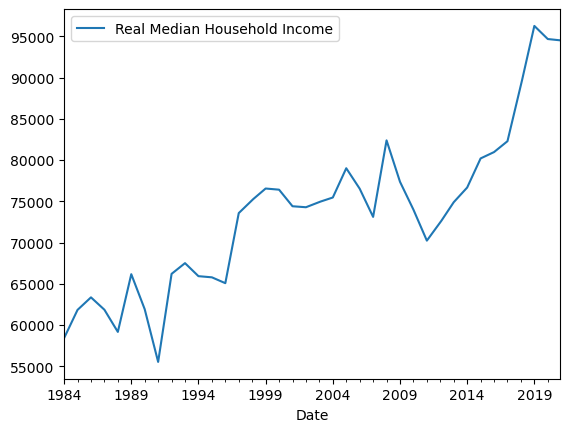

In [4]:
#Plot Dataframes
df_rmhi.plot(subplots=True)

In [5]:
#Prepare the data for Prophet
m = Prophet()
m

df_rmhi.reset_index(inplace=True)
prepped_df_rmhi = df_rmhi.rename(columns={'Date': 'ds', 'Real Median Household Income':'y'})
display(prepped_df_rmhi.tail())


#Train the model
m.fit(prepped_df_rmhi)



,ds,y
439,2020-08-01,94580.833333
440,2020-09-01,94566.666667
441,2020-10-01,94552.500000
442,2020-11-01,94538.333333
443,2020-12-01,94524.166667


21:47:21 - cmdstanpy - INFO - Chain [1] start processing
21:47:21 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
#Make predictions

future_df_rmhi = m.make_future_dataframe(periods=36, freq="MS")
future_df_rmhi.tail(37)


,ds
443,2020-12-01
444,2021-01-01
445,2021-02-01
446,2021-03-01
447,2021-04-01
448,2021-05-01
449,2021-06-01
450,2021-07-01
451,2021-08-01
452,2021-09-01


In [7]:
#Make the predictions
future_df_rmhi = m.predict(future_df_rmhi)
future_df_rmhi.tail(37)





,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
443,2020-12-01,97536.927694,95018.991489,100059.357099,97536.927694,97536.927694,-18.686087,-18.686087,-18.686087,-18.686087,-18.686087,-18.686087,0.0,0.0,0.0,97518.241607
444,2021-01-01,97798.177581,95251.723660,100525.874589,97798.177581,97798.177581,309.160397,309.160397,309.160397,309.160397,309.160397,309.160397,0.0,0.0,0.0,98107.337978
445,2021-02-01,98059.427469,95604.927187,100716.872265,98059.427469,98059.427469,141.024387,141.024387,141.024387,141.024387,141.024387,141.024387,0.0,0.0,0.0,98200.451856
446,2021-03-01,98295.395109,95734.936232,100951.556902,98295.395109,98295.395109,21.822112,21.822112,21.822112,21.822112,21.822112,21.822112,0.0,0.0,0.0,98317.217221
447,2021-04-01,98556.644996,96061.444742,101202.599943,98556.644996,98556.644996,59.622414,59.622414,59.622414,59.622414,59.622414,59.622414,0.0,0.0,0.0,98616.267411
448,2021-05-01,98809.467468,96318.137897,101556.314943,98799.730725,98821.484925,80.914166,80.914166,80.914166,80.914166,80.914166,80.914166,0.0,0.0,0.0,98890.381634
449,2021-06-01,99070.717355,96625.466466,101710.642237,99048.472461,99096.125398,84.485204,84.485204,84.485204,84.485204,84.485204,84.485204,0.0,0.0,0.0,99155.202559
450,2021-07-01,99323.539827,96672.276130,102012.028396,99285.400112,99363.274853,85.364490,85.364490,85.364490,85.364490,85.364490,85.364490,0.0,0.0,0.0,99408.904316
451,2021-08-01,99584.789714,97168.557355,102124.539834,99518.517219,99645.826965,77.599185,77.599185,77.599185,77.599185,77.599185,77.599185,0.0,0.0,0.0,99662.388899
452,2021-09-01,99846.039601,97430.640092,102370.184316,99752.941327,99933.574565,55.440899,55.440899,55.440899,55.440899,55.440899,55.440899,0.0,0.0,0.0,99901.480500


/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


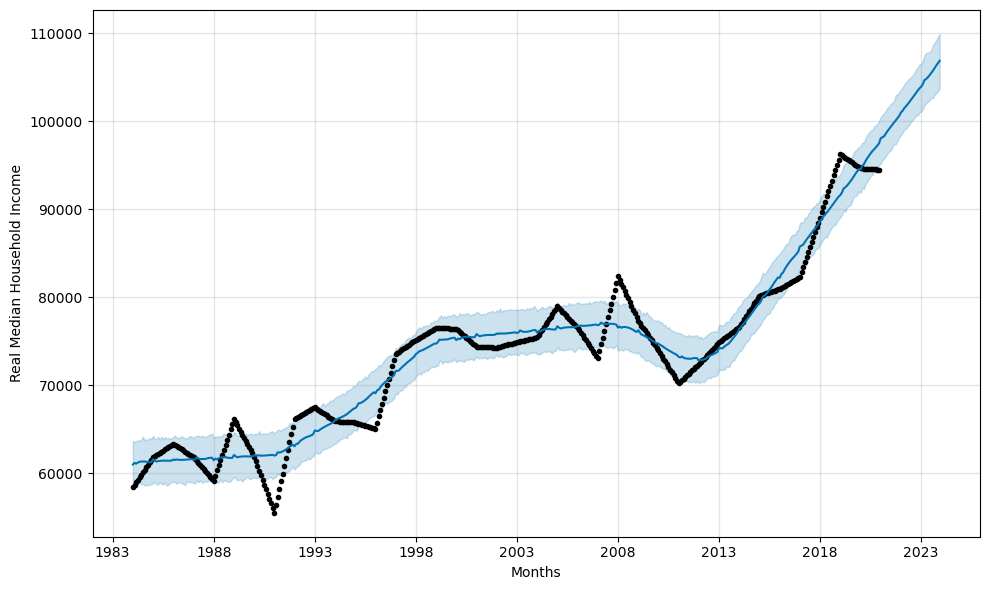

In [8]:
#Plot the predictions
fig1 = m.plot(future_df_rmhi, xlabel='Months', ylabel='Real Median Household Income')

/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

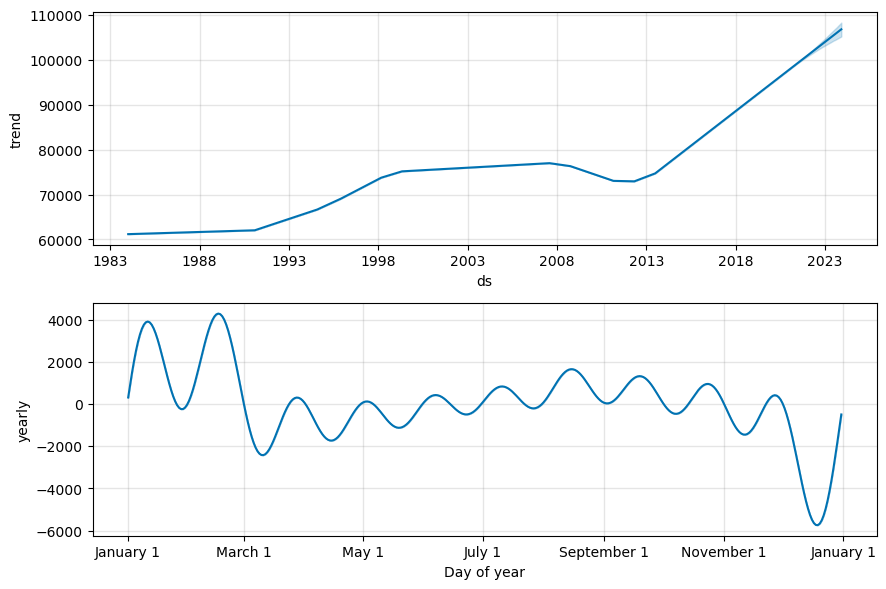

In [9]:
#Evaluate the model

fig2 = m.plot_components(future_df_rmhi)




In [10]:
future_df_rmhi.tail(37) 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
443,2020-12-01,97536.927694,95018.991489,100059.357099,97536.927694,97536.927694,-18.686087,-18.686087,-18.686087,-18.686087,-18.686087,-18.686087,0.0,0.0,0.0,97518.241607
444,2021-01-01,97798.177581,95251.723660,100525.874589,97798.177581,97798.177581,309.160397,309.160397,309.160397,309.160397,309.160397,309.160397,0.0,0.0,0.0,98107.337978
445,2021-02-01,98059.427469,95604.927187,100716.872265,98059.427469,98059.427469,141.024387,141.024387,141.024387,141.024387,141.024387,141.024387,0.0,0.0,0.0,98200.451856
446,2021-03-01,98295.395109,95734.936232,100951.556902,98295.395109,98295.395109,21.822112,21.822112,21.822112,21.822112,21.822112,21.822112,0.0,0.0,0.0,98317.217221
447,2021-04-01,98556.644996,96061.444742,101202.599943,98556.644996,98556.644996,59.622414,59.622414,59.622414,59.622414,59.622414,59.622414,0.0,0.0,0.0,98616.267411
448,2021-05-01,98809.467468,96318.137897,101556.314943,98799.730725,98821.484925,80.914166,80.914166,80.914166,80.914166,80.914166,80.914166,0.0,0.0,0.0,98890.381634
449,2021-06-01,99070.717355,96625.466466,101710.642237,99048.472461,99096.125398,84.485204,84.485204,84.485204,84.485204,84.485204,84.485204,0.0,0.0,0.0,99155.202559
450,2021-07-01,99323.539827,96672.276130,102012.028396,99285.400112,99363.274853,85.364490,85.364490,85.364490,85.364490,85.364490,85.364490,0.0,0.0,0.0,99408.904316
451,2021-08-01,99584.789714,97168.557355,102124.539834,99518.517219,99645.826965,77.599185,77.599185,77.599185,77.599185,77.599185,77.599185,0.0,0.0,0.0,99662.388899
452,2021-09-01,99846.039601,97430.640092,102370.184316,99752.941327,99933.574565,55.440899,55.440899,55.440899,55.440899,55.440899,55.440899,0.0,0.0,0.0,99901.480500


In [11]:

# Evaluate the Model

# Compare the yhat data in index 456 to the last row of the original dataframe
last_value_original = df_rmhi_source.iloc[-1]['Real Median Household Income']
yhat_value = future_df_rmhi.iloc[456]['yhat']

print(f'Last value in original dataframe: {last_value_original}')
print(f'Predicted value: {yhat_value}')



Last value in original dataframe: 95800.0
Predicted value: 101024.6979301469
